### This Python File is related to derive Building density of Nakagawa Region

In [50]:
import osmnx as ox
import networkx as nx
import geopandas as gpd
import matplotlib.pyplot as plt
import folium
import pandas as pd
import numpy as np
import matplotlib
from folium import plugins
from shapely.geometry import Point,LineString,MultiPoint
from shapely.ops import nearest_points
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [2]:
place='Nakagawa-ku,Nagoya,Japan'
gdf=ox.geocoder.geocode_to_gdf(place)
G=ox.graph_from_place(place)
footprints=ox.geometries.geometries_from_place(place,tags={"building":True})

nodes,edges=ox.graph_to_gdfs(G)

In [3]:
gdf

,geometry,bbox_north,bbox_south,bbox_east,bbox_west,place_id,osm_type,osm_id,lat,lon,display_name,class,type,importance
0,"POLYGON ((136.79731 35.12675, 136.79732 35.126...",35.167973,35.109901,136.898682,136.797307,285558538,relation,4567592,35.131725,136.839144,"Nakagawa Ward, Nagoya, Aichi Prefecture, Japan",boundary,administrative,0.773542


<AxesSubplot:>

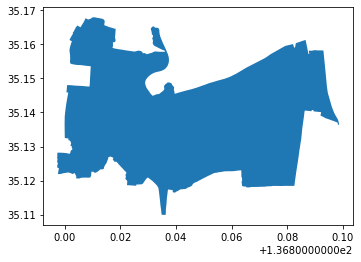

In [4]:
gdf.plot()

In [5]:
gdf.columns.tolist()

['geometry',
 'bbox_north',
 'bbox_south',
 'bbox_east',
 'bbox_west',
 'place_id',
 'osm_type',
 'osm_id',
 'lat',
 'lon',
 'display_name',
 'class',
 'type',
 'importance']

In [6]:
box=gdf[['bbox_north',
 'bbox_south',
 'bbox_east',
 'bbox_west']]
box

,bbox_north,bbox_south,bbox_east,bbox_west
0,35.167973,35.109901,136.898682,136.797307


In [9]:
# Extract 30 evenly spaced points  
lats=np.linspace(box['bbox_north'].iloc[0],box['bbox_south'].iloc[0],20)
longs=np.linspace(box['bbox_west'].iloc[0],box['bbox_east'].iloc[0],20)

print(lats)

[35.167973   35.16491658 35.16186016 35.15880374 35.15574732 35.15269089
 35.14963447 35.14657805 35.14352163 35.14046521 35.13740879 35.13435237
 35.13129595 35.12823953 35.12518311 35.12212668 35.11907026 35.11601384
 35.11295742 35.109901  ]


In [10]:
# Initialize 20*20 2d array

buildings_count=np.zeros((len(lats)-1,len(longs)-1))

In [11]:
for i in range(len(lats)-1):
    for j in range(len(longs)-1):
        north=lats[i]
        south=lats[i+1]
        west=longs[j]
        east=longs[j+1]
        
        buildings=ox.geometries.geometries_from_bbox(north,south,east,west,tags={"building":True})
        buildings_count[i][j]=int(buildings.shape[0]) # Count the no of building and store it

<AxesSubplot:>

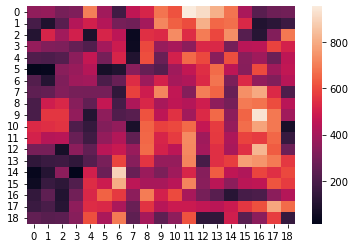

In [13]:
import seaborn as sns
sns.heatmap(buildings_count)

In [16]:
buildings_count.astype(int)
print(buildings_count.shape)

(19, 19)


In [18]:
lat=[]
long=[]
density=[]
for i in range(19):
  
  for j in range(19):
    lat.append(lats[i])
    long.append(longs[j])
    density.append(buildings_count[i][j])

In [19]:
df=pd.DataFrame()
df["lat"]=lat
df["long"]=long
df["density"]=density

df.head()

,lat,long,density
0,35.167973,136.797307,354.0
1,35.167973,136.802643,366.0
2,35.167973,136.807978,300.0
3,35.167973,136.813314,318.0
4,35.167973,136.818649,704.0


In [20]:
df.density.unique()

array([354., 366., 300., 318., 704., 389., 174., 455., 514., 680., 615.,
       954., 914., 810., 681., 409., 227., 276., 288., 189.,  92., 228.,
       429., 501., 431., 297., 284., 399., 716., 641., 603., 808., 654.,
       669., 527.,  96., 123., 162., 104., 515., 391., 499.,  85., 449.,
        42., 545., 530., 730., 537., 694., 594., 735., 225., 111., 323.,
       686., 365., 321., 315., 260., 215., 397., 486.,  47., 597., 368.,
       406., 347., 528., 526., 295., 440., 448., 586., 509., 210., 204.,
       220., 344., 467., 607., 268., 503., 657., 338., 339., 385., 274.,
       451.,  24.,  30., 372., 435.,  72.,  97., 262., 223., 386., 465.,
       541., 662., 452., 334., 598., 459., 216., 107., 317., 383., 394.,
       199., 264., 536., 379., 400., 424., 679., 310., 531., 358., 439.,
       243., 254., 325., 294., 135., 580., 490., 718., 461., 329., 698.,
       646., 795., 208., 196., 492., 521., 337., 251., 190., 415., 523.,
       430., 350., 299., 693., 678., 604., 559., 55

In [21]:
df.density.max()

954.0

In [22]:
df.density.min()

14.0

In [23]:
df.density.mean()

419.01939058171746

In [40]:
den_100=df.loc[df.density<=100]
den_200=df.loc[(df.density>100)& (df.density<=200)]
den_400=df.loc[(df.density>200)& (df.density<=400)]
den_600=df.loc[(df.density>400)& (df.density<=600)]
den_800=df.loc[(df.density>600) & (df.density<=800)]
den_1000=df.loc[df.density>800]

In [35]:
gdf.to_crs(gdf.crs).geometry.centroid

C:\Users\avi00\AppData\Local\Temp/ipykernel_30472/1214610404.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf.to_crs(gdf.crs).geometry.centroid


0    POINT (136.84469 35.13896)
dtype: geometry

In [38]:
geo_map=folium.Map(locations=(35.13896,136.84469),zoom_start=14)

In [44]:
geo_map.add_child(plugins.HeatMap(den_100[['lat','long']].to_numpy(),\
                                         radius = 25, min_opacity = 0.7, gradient = {0.4: 'blue', 0.45: 'blue', 1: 'lime'}))
geo_map.add_child(plugins.HeatMap(den_200[['lat','long']].to_numpy(),\
                                         radius = 25, min_opacity = 0.7, gradient = {0.5: 'blue', 0.55: 'blue', 1: 'red'}))
geo_map.add_child(plugins.HeatMap(den_400[['lat','long']].to_numpy(),\
                                         radius = 25, min_opacity = 0.7, gradient = {0.6: 'blue', 0.65: 'lime', 1: 'lime'}))
geo_map.add_child(plugins.HeatMap(den_600[['lat','long']].to_numpy(),\
                                         radius = 25, min_opacity = 0.7, gradient = {0.7: 'blue', 0.75: 'red', 1: 'lime'}))
geo_map.add_child(plugins.HeatMap(den_800[['lat','long']].to_numpy(),\
                                         radius = 25, min_opacity = 0.7, gradient = {0.8: 'blue', 0.85: 'red', 1: 'lime'}))
geo_map.add_child(plugins.HeatMap(den_1000[['lat','long']].to_numpy(),\
                                         radius = 25, min_opacity = 0.7, gradient = {0.9: 'blue', 0.95: 'blue', 1: 'red'}))
geo_map

In [47]:
edges["geometry"].iloc[0].bounds[0]

136.8173714

In [48]:
df.head(10)

,lat,long,density
0,35.167973,136.797307,354.0
1,35.167973,136.802643,366.0
2,35.167973,136.807978,300.0
3,35.167973,136.813314,318.0
4,35.167973,136.818649,704.0
5,35.167973,136.823985,389.0
6,35.167973,136.829320,174.0
7,35.167973,136.834656,455.0
8,35.167973,136.839991,514.0
9,35.167973,136.845327,680.0


In [57]:
points=MultiPoint([(x,y) for y,x in zip(df.lat,df.long)])
points[0].wkt

'POINT (136.797307 35.167973)'

In [59]:
edges.geometry.iloc[0].wkt

'LINESTRING (136.8173714 35.1582232, 136.8177974 35.1581755, 136.8181761 35.1581297, 136.8188864 35.1580434, 136.8193203 35.157987, 136.8198241 35.1579136, 136.8203223 35.1578285, 136.8207846 35.1577585, 136.8211718 35.1577083, 136.8212393 35.1577025, 136.8215342 35.1576825, 136.8215962 35.157677, 136.8219622 35.157636, 136.822313 35.1575997, 136.8224234 35.1575913, 136.8233491 35.1575359)'

In [62]:
nearest_points(points,edges.geometry.iloc[0])[0].wkt

'POINT (136.8186491052631 35.15880373684211)'

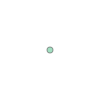

In [65]:
nearest_points(points,edges.geometry.iloc[0])[0]

In [82]:
int(df.loc[(df.lat==nearest_points(points,edges.geometry.iloc[0])[0].y)\
       &(df.long==nearest_points(points,edges.geometry.iloc[0])[0].x)]['density'])

215

In [49]:
edges.head(10)

osmid  \
u         v          key                                                 
287037206 6418759114 0                          [235402848, 940877736]   
          8687399278 0    [937718833, 940585691, 766866772, 766866773]   
287051498 1161617447 0                                       140501318   
          3909362365 0                                       311076737   
287051557 7561108865 0                                       808602349   
          1583797810 0                                       377980319   
          7561108871 0                                       808602349   
287051561 7561108867 0                                       144899037   
          3820438899 0                                       366791944   
          1583798124 0                                       377980319   

                                  bridge  oneway lanes       ref  \
u         v          key                                           
287037206 6418759114 0    [viaduct, yes]    True     2  [5, E23]   
          8687399278 0               yes    True   NaN       NaN   
287051498 1161617447 0               NaN   False   NaN       NaN   
          3909362365 0               NaN    True     2         1   
287051557 7561108865 0               NaN   False     2       106   
          1583797810 0               NaN    True     2         1   
          7561108871 0               NaN   False     2       106   
287051561 7561108867 0               NaN   False     2       NaN   
          3820438899 0               NaN   False   NaN       NaN   
          1583798124 0               NaN    True     2         1   

                                           name        highway   length  \
u         v          key                                                  
287037206 6418759114 0    [東名阪自動車道, 名古屋高速5号万場線]       motorway  549.217   
          8687399278 0              名古屋第二環状自動車道  motorway_link  717.481   
287051498 1161617447 0                      NaN   unclassified   12.298   
          3909362365 0                     国道1号          trunk  106.927   
287051557 7561108865 0                  鳥ヶ地名古屋線      secondary   12.813   
          1583797810 0                     国道1号          trunk   80.047   
          7561108871 0                  鳥ヶ地名古屋線      secondary   48.941   
287051561 7561108867 0                      NaN       tertiary   10.355   
          3820438899 0                      NaN       tertiary    9.229   
          1583798124 0                     国道1号          trunk  132.706   

                                                                   geometry  \
u         v          key                                                      
287037206 6418759114 0    LINESTRING (136.81737 35.15822, 136.81780 35.1...   
          8687399278 0    LINESTRING (136.81737 35.15822, 136.81817 35.1...   
287051498 1161617447 0    LINESTRING (136.84672 35.12402, 136.84672 35.1...   
          3909362365 0    LINESTRING (136.84672 35.12402, 136.84555 35.1...   
287051557 7561108865 0    LINESTRING (136.83310 35.12414, 136.83311 35.1...   
          1583797810 0    LINESTRING (136.83310 35.12414, 136.83293 35.1...   
          7561108871 0    LINESTRING (136.83310 35.12414, 136.83323 35.1...   
287051561 7561108867 0    LINESTRING (136.82985 35.12526, 136.82989 35.1...   
          3820438899 0    LINESTRING (136.82985 35.12526, 136.82981 35.1...   
          1583798124 0    LINESTRING (136.82985 35.12526, 136.82851 35.1...   

                         est_width maxspeed tunnel service width  
u         v          key                                          
287037206 6418759114 0         NaN      NaN    NaN     NaN   NaN  
          8687399278 0         NaN      NaN    NaN     NaN   NaN  
287051498 1161617447 0         NaN      NaN    NaN     NaN   NaN  
          3909362365 0         NaN      NaN    NaN     NaN   NaN  
287051557 7561108865 0         NaN      NaN    NaN     NaN   NaN  
          1583797810 0         NaN      

In [84]:
edges['building_count']=0

for i in range(edges.shape[0]):
    p=nearest_points(points,edges.geometry.iloc[i])[0]  #nearest location 
    bc= int(df.loc[(df.lat==p.y)&(df.long==p.x)]['density']) #building count
    edges['building_count'].iloc[i]=bc

In [85]:
edges['building_count'].isnull().sum()

0

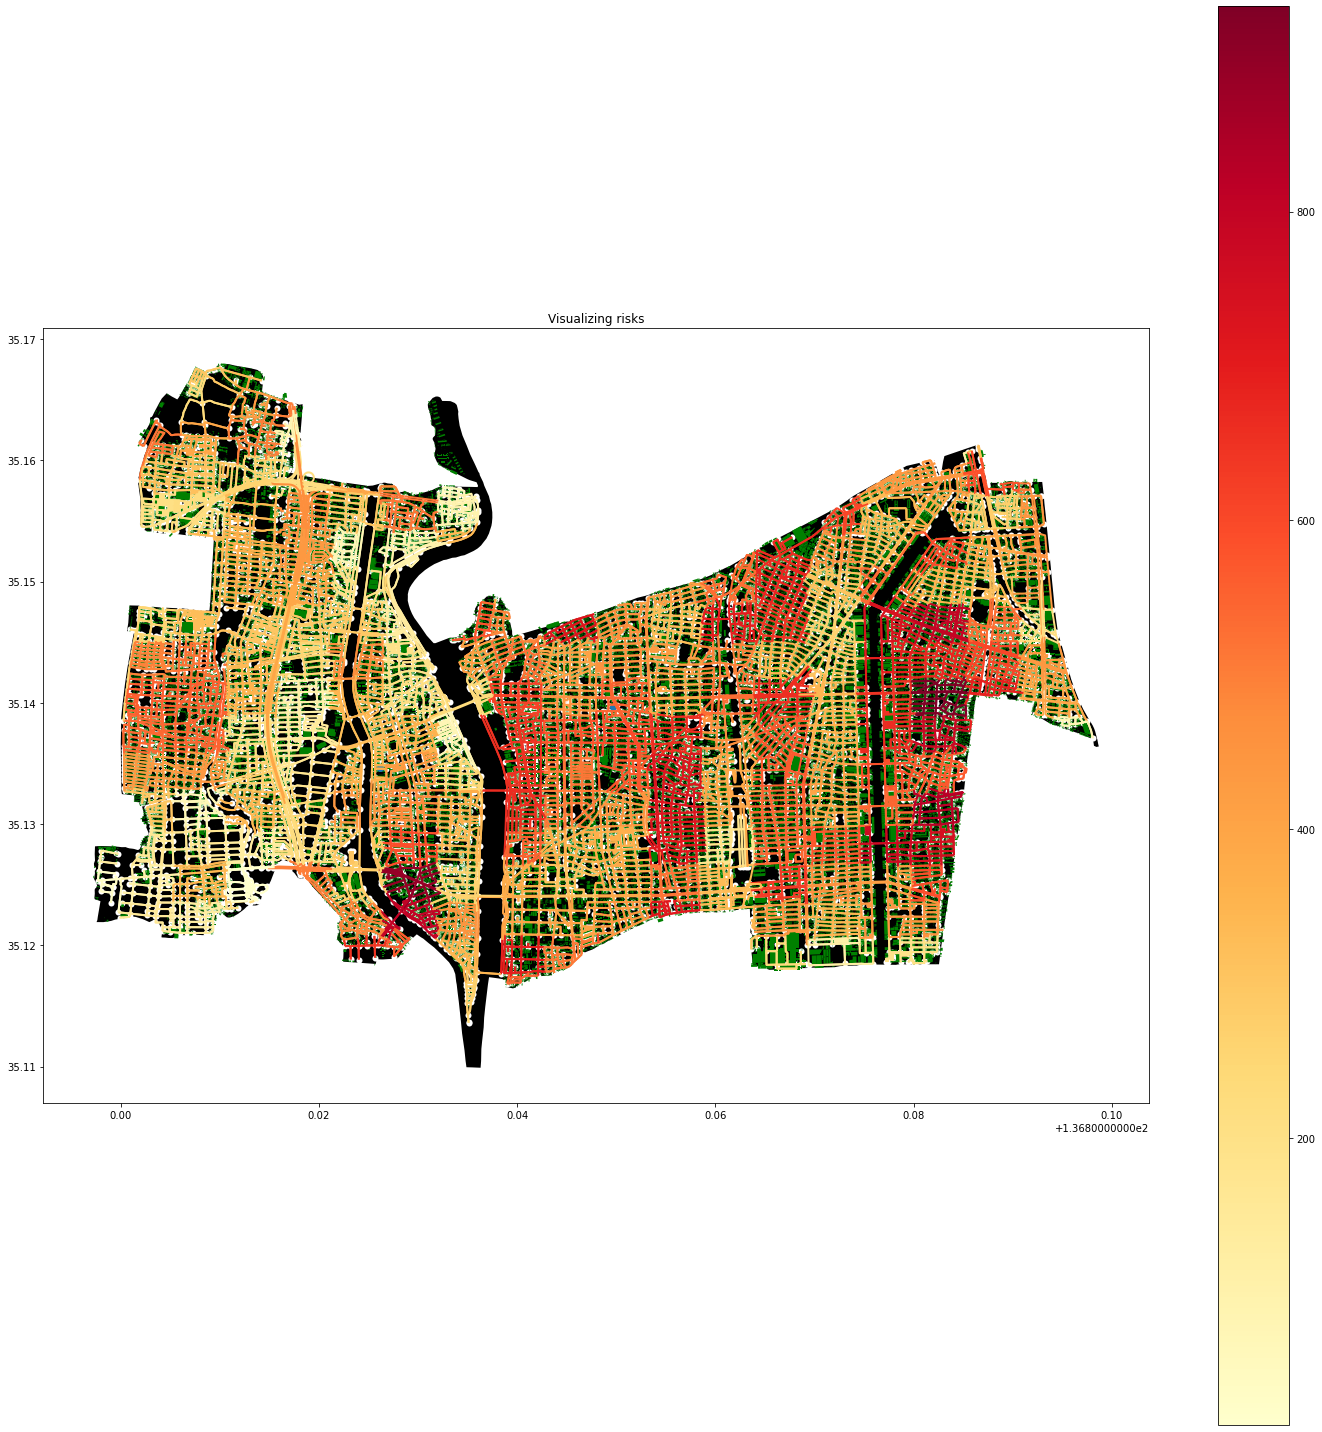

In [88]:
fig, ax = plt.subplots(figsize=(20, 20))
gdf.plot(ax=ax, facecolor='black')
edges.plot(ax=ax, linewidth=2, column='building_count', cmap='YlOrRd')
nodes.plot(ax=ax, linewidth=0, facecolor='white')
footprints.plot(ax=ax,facecolor='green')
sm = plt.cm.ScalarMappable(cmap='YlOrRd', 
                           norm = matplotlib.colors.Normalize(vmin=edges['building_count'].min(),
                                                              vmax=edges['building_count'].max()))
sm.set_array([])
fig.colorbar(sm, ax=ax)
ax.set_title('Visualizing risks')
fig.tight_layout()

In [90]:
fig.savefig('nakagawa_graph_building_density_risk.jpg')

In [91]:
g=ox.utils_graph.graph_from_gdfs(nodes,edges)
nx.write_gpickle(g, "nakagawa_graph_building_density_risk_addded.pickle")